#                                            Q1)

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold
import statsmodels.api as sm
from statsmodels.formula.api import logit
from numpy import mean
from numpy import std
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# Importing the dataset

In [2]:
# Import the dataset from https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/leukemia_remission.txt
patient_data = pd.read_csv("leukemia_remission.csv", sep="\t")

### Exploratory Data Analysis

In [3]:
patient_data.describe()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.333333,0.881481,0.635185,0.570741,1.003704,0.688519,0.997407
std,0.480384,0.186645,0.214052,0.237567,0.467795,0.534960,0.014830
min,0.000000,0.200000,0.320000,0.080000,0.400000,0.000000,0.980000
25%,0.000000,0.825000,0.430000,0.335000,0.650000,0.230000,0.990000
50%,0.000000,0.950000,0.650000,0.630000,0.900000,0.520000,0.990000
75%,1.000000,1.000000,0.835000,0.740000,1.250000,1.060000,1.005000
max,1.000000,1.000000,0.970000,0.920000,1.900000,2.060000,1.040000


In [4]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REMISS  27 non-null     int64  
 1   CELL    27 non-null     float64
 2   SMEAR   27 non-null     float64
 3   INFIL   27 non-null     float64
 4   LI      27 non-null     float64
 5   BLAST   27 non-null     float64
 6   TEMP    27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


In [5]:
patient_data.shape

(27, 7)

## Preparing the dependent and independant variables

In [6]:
## Extract X as all columns except the first column and Y as first column.
X = patient_data.drop('REMISS', axis=1)
Y = patient_data[['REMISS']]

## Data Visualization

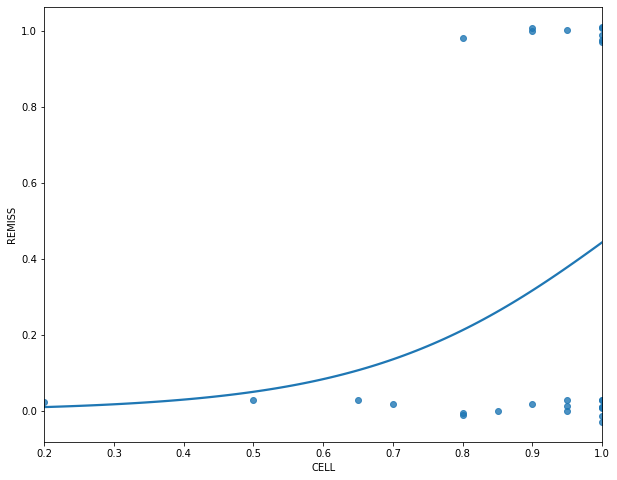

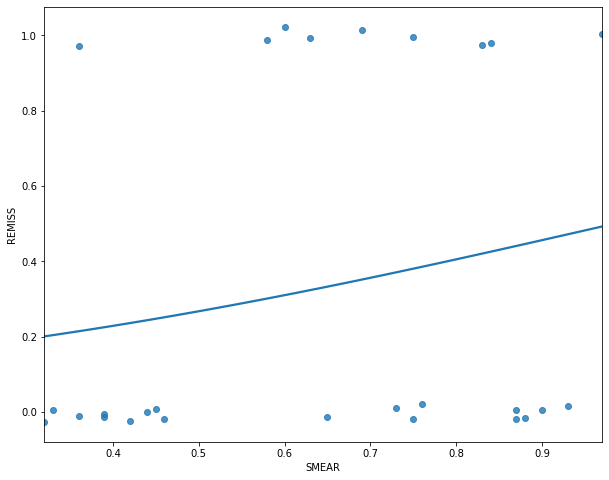

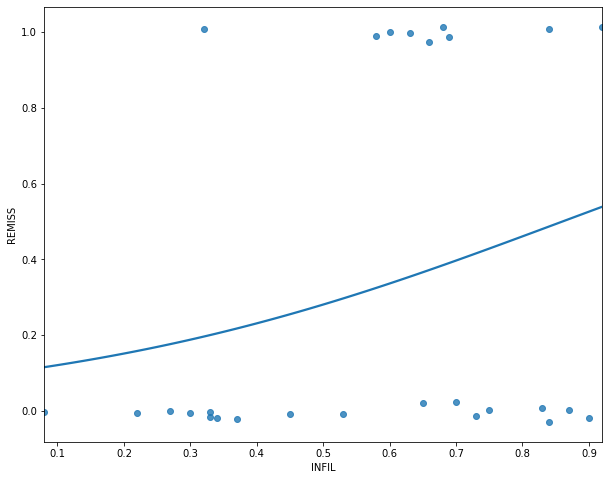

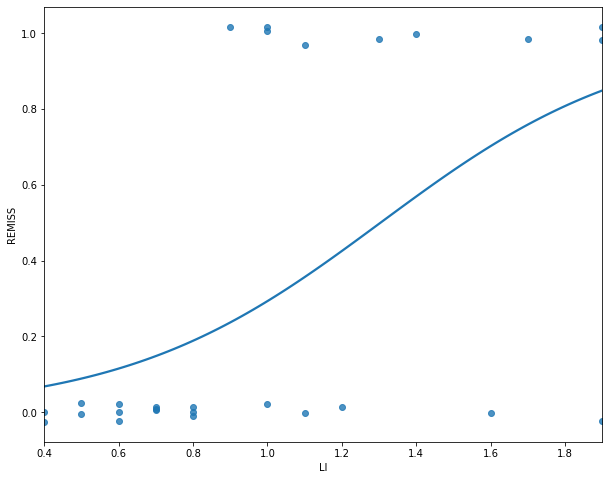

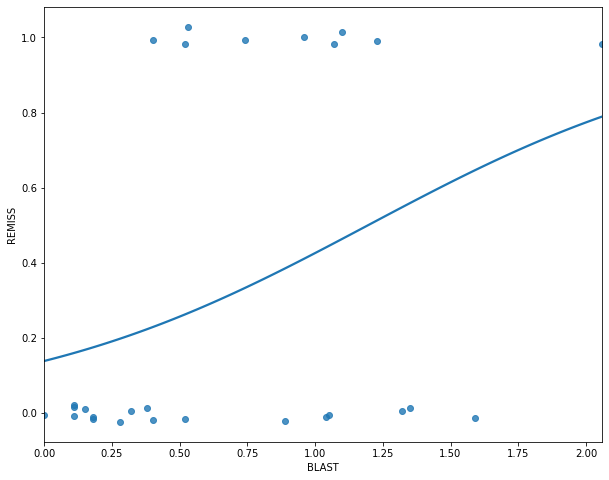

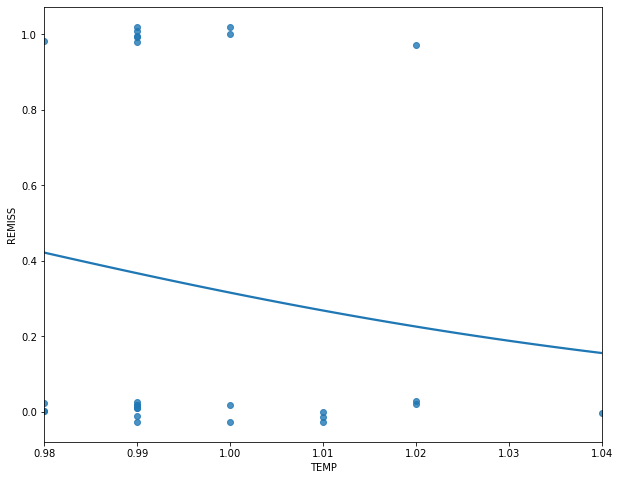

In [7]:
## Visualize the dataset.
def plot_reg(x_axis, y_axis, df):
    plt.figure(figsize = (10, 8))
    sns.regplot(x=x_axis, y=y_axis, data = df, y_jitter = 0.03, logistic = True, ci = None)
    
y_axis = 'REMISS'
for col in X.columns:
    plot_reg(col, y_axis, patient_data)

## Calculating the Accuracy , Confusion Matrix, Coefficients and Logistic Regression Equation

In [8]:
def perform_log_reg(train_data, test_data, fold):
    
    log_reg_equation = ('REMISS ~ CELL + SMEAR + INFIL +  LI + BLAST + TEMP')
    model = logit(formula = log_reg_equation, data = train_data).fit(method='bfgs')
    # Prediction
    pred = model.predict(exog = test_data)

    # Cutoff value
    cutoff = 0.5

    # Compute class predictions
    y_pred = np.where(pred > cutoff, 1, 0)

    #Assigning actual labels
    y_actual = test_data["REMISS"]

    # Confusion matrix
    cm = pd.crosstab(y_actual, y_pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

    # Calculating Accuracy
    acc = accuracy_score(y_actual, y_pred)
    return log_reg_equation, np.exp(model.params), cm , acc

## Performing K-Fold Cross Validation ( n_splits = 10 )

In [9]:
## 10-Fold Cross Validation Data Set
def log_reg_with_kfold_cv(x, y):
    
    kf = KFold(n_splits=10)
    count = 1
    if count <= 10:
        acc_list = []
        fold_intercept_cm = defaultdict(dict)
        for record_x, record_y in zip(kf.split(x), kf.split(y)):
            train_frame_xdf = pd.DataFrame()
            train_frame_ydf = pd.DataFrame()
            for tr_idx, tr_idy in zip(record_x[0].tolist(), record_y[0].tolist()) :
                train_frame_xdf = pd.concat([train_frame_xdf, x.iloc[[tr_idx]]], ignore_index=True)
                train_frame_ydf = pd.concat([train_frame_ydf, y.iloc[[tr_idy]]], ignore_index=True)
            
            test_frame_xdf = pd.DataFrame()
            test_frame_ydf = pd.DataFrame()
            for tst_idx, tst_idy in zip(record_x[1].tolist(), record_y[1].tolist()):
                test_frame_xdf = pd.concat([test_frame_xdf, x.iloc[[tst_idx]]], ignore_index=True)
                test_frame_ydf = pd.concat([test_frame_ydf, y.iloc[[tst_idy]]], ignore_index=True)
                
            train_data = pd.concat([train_frame_ydf, train_frame_xdf],axis=1) 
            test_data = pd.concat([test_frame_ydf, test_frame_xdf],axis=1)
            fold_count = 'Fold' + str(count)
            logregequation, intercept, conf_mat, returned_acc = perform_log_reg(train_data, test_data, count)
            count+=1
            fold_intercept_cm[fold_count]['Intercept'] = intercept
            fold_intercept_cm[fold_count]['Confusion Matrix'] = conf_mat
            fold_intercept_cm[fold_count]['Accuracy'] = returned_acc
        return logregequation, fold_intercept_cm

## Collating the accuracies of 10 fold data set, Calculating the max and mean of accuracies

         Current function value: 0.413883
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.444971
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.290739
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.471889
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.451531
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.467981
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.447570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.432398
         Iterations:

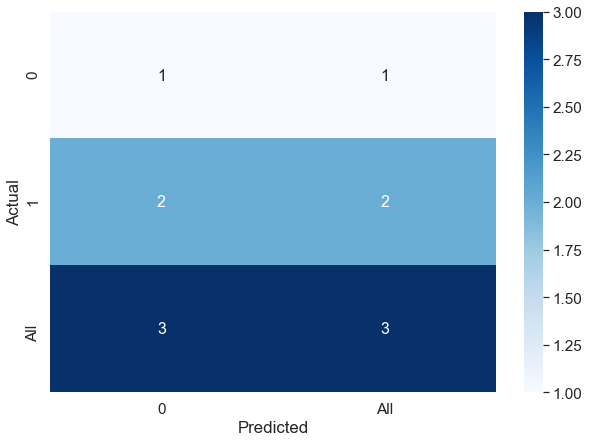

Fold :              Fold2
Accuracy : 
 0.6666666666666666
Intercept : 
 Intercept      0.010674
CELL         780.059555
SMEAR          0.113181
INFIL         32.584260
LI            15.733271
BLAST          0.665364
TEMP           0.003295
dtype: float64


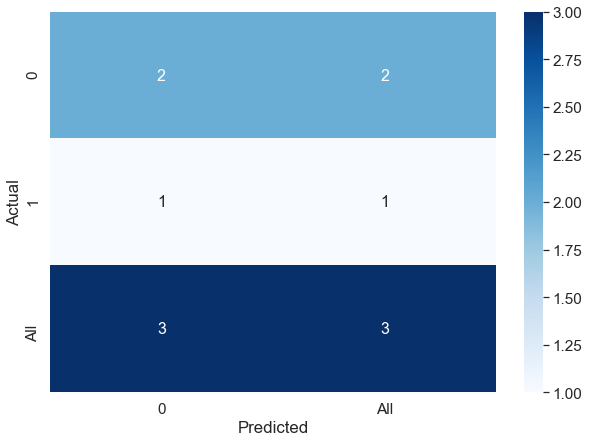

Fold :              Fold3
Accuracy : 
 0.3333333333333333
Intercept : 
 Intercept    5.881733e-06
CELL         7.327370e+06
SMEAR        2.435176e-03
INFIL        1.805048e+04
LI           4.760356e+03
BLAST        1.556131e-02
TEMP         7.615180e-06
dtype: float64


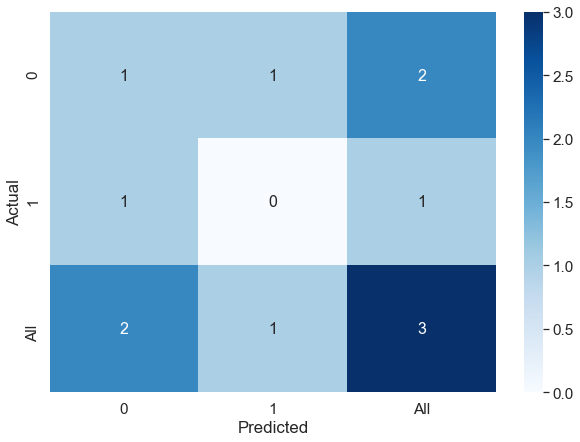

Fold :              Fold4
Accuracy : 
 1.0
Intercept : 
 Intercept     0.022238
CELL         93.849377
SMEAR         0.386772
INFIL        14.730205
LI           34.115597
BLAST         0.265935
TEMP          0.008405
dtype: float64


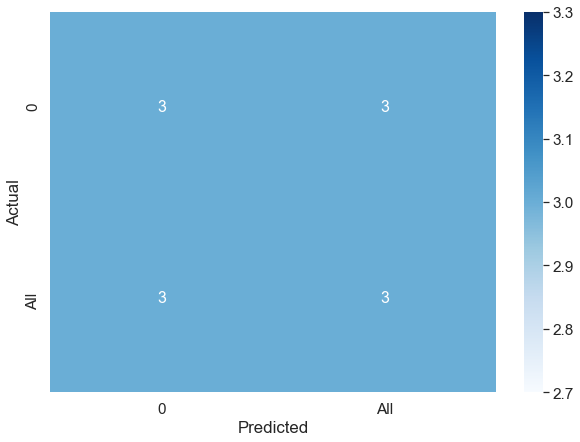

Fold :              Fold5
Accuracy : 
 0.6666666666666666
Intercept : 
 Intercept       0.003187
CELL         2848.928966
SMEAR           0.073471
INFIL         459.229478
LI             57.226029
BLAST           0.223726
TEMP            0.000521
dtype: float64


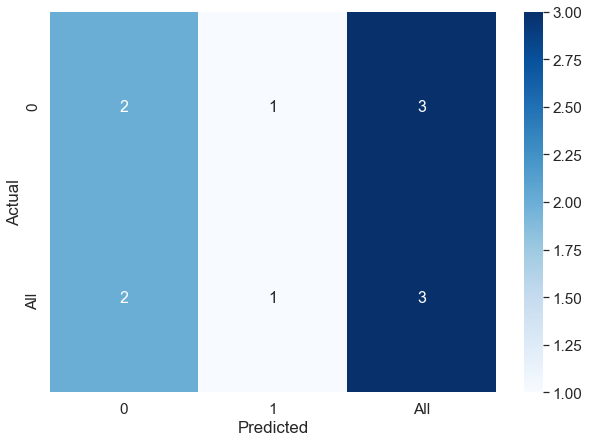

Fold :              Fold6
Accuracy : 
 1.0
Intercept : 
 Intercept      0.010690
CELL         563.657284
SMEAR          0.146176
INFIL         38.615051
LI            26.587231
BLAST          0.374551
TEMP           0.003082
dtype: float64


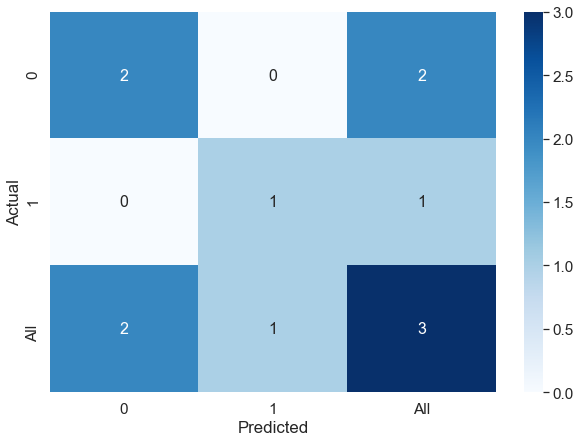

Fold :              Fold7
Accuracy : 
 0.6666666666666666
Intercept : 
 Intercept      0.005848
CELL         580.022993
SMEAR          0.163909
INFIL         75.957673
LI            54.427890
BLAST          0.181346
TEMP           0.002121
dtype: float64


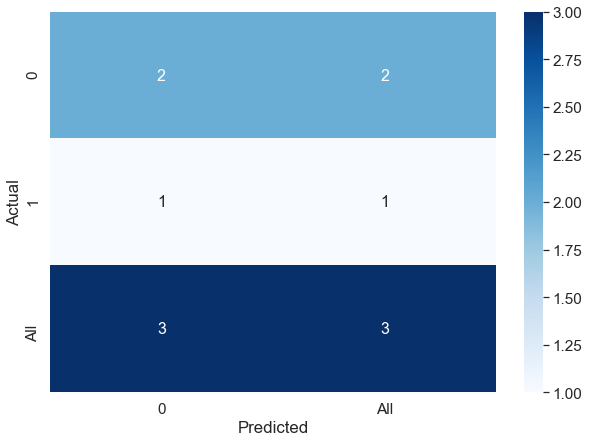

Fold :              Fold8
Accuracy : 
 0.5
Intercept : 
 Intercept      0.018838
CELL         124.707506
SMEAR          0.327693
INFIL         18.821831
LI            27.369606
BLAST          0.563632
TEMP           0.003841
dtype: float64


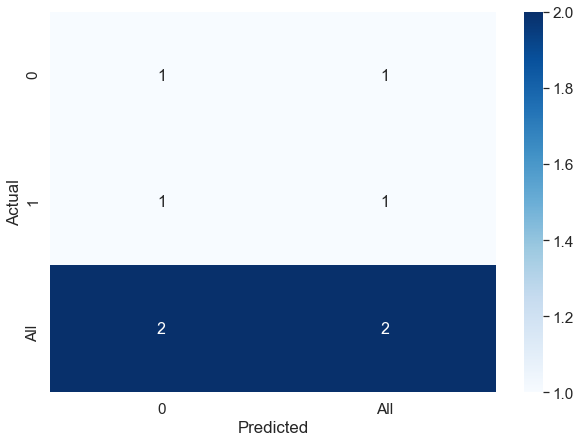

Fold :              Fold9
Accuracy : 
 0.5
Intercept : 
 Intercept       0.006920
CELL         3960.652319
SMEAR           0.026365
INFIL          14.389818
LI             93.641560
BLAST           0.410717
TEMP            0.001250
dtype: float64


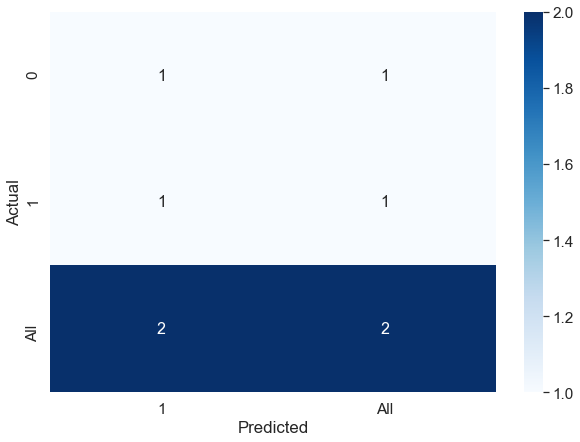

Fold :              Fold10
Accuracy : 
 0.5
Intercept : 
 Intercept      0.015545
CELL         209.701031
SMEAR          0.209988
INFIL         18.183795
LI            27.956989
BLAST          0.543426
TEMP           0.004177
dtype: float64


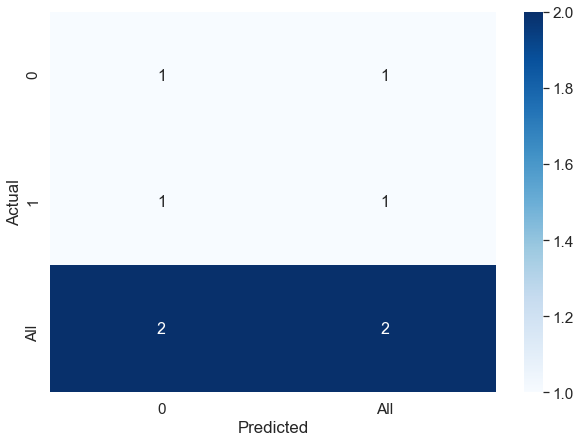

Mean Accuracy :  0.6166666666666666


In [10]:
# Fit model for K-Fold data set
reg_equation, compute_params = log_reg_with_kfold_cv(X, Y)
compute_params = dict(compute_params)
print("-----------------------------------------------\n")
print("Logistic Regression Equation : ", reg_equation)
print("\n-----------------------------------------------\n")
acc_list = []
for key, value in compute_params.items():
    acc_list.append(compute_params[key]['Accuracy'])
    print("============================================")
    print("Fold :             ", key)
    print("============================================")
    print("Accuracy : \n", compute_params[key]['Accuracy'])
    print("============================================")
    print("Intercept : \n", compute_params[key]['Intercept'])
    print("============================================")
    #print("Confusion Matrix : \n", compute_params[key]['Confusion Matrix'])
    df_cm = compute_params[key]['Confusion Matrix']
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
    plt.show()
    print("============================================")
print("============================================")
print("Mean Accuracy : ", mean(acc_list))
print("============================================")

## Correlation between all the attributes

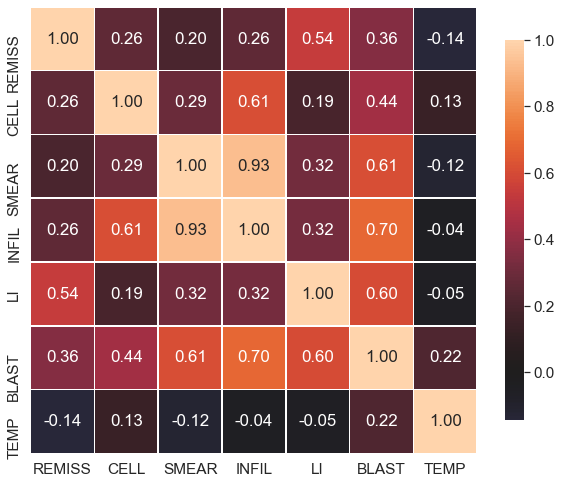

In [11]:
corr = patient_data.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()